In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df_train=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
df_test=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
sample_subm=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv")  
 

In [16]:
#Adding day/month week

import calendar
from datetime import date

def date_to_day(year,month,day):
    d = calendar.weekday(year, month, day)
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days[d]


def add_dates(combined):
    combined['year']=combined['date'].apply(lambda x: x.split('-')[0]).astype(int)
    combined['month']=combined['date'].apply(lambda x: x.split('-')[1]).astype(int)
    combined['day']=combined['date'].apply(lambda x: x.split('-')[2]).astype(int)
    combined['day_of_the_week']=combined.apply(lambda row: date_to_day(row['year'], row['month'], row['day']), axis=1)
    combined['week_number'] = combined.apply(lambda row: date(row['year'], row['month'], row['day']).isocalendar()[1], axis=1)
    return combined
    
#and day of the week
 

df_test=add_dates(df_test)
df_train =add_dates(df_train)

In [17]:
df_train.sample(5)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_the_week,week_number
485097,485097,2013-09-30,2,PRODUCE,0.0,0,2013,9,30,Monday,40
259638,259638,2013-05-26,43,PLAYERS AND ELECTRONICS,0.0,0,2013,5,26,Sunday,21
1337332,1337332,2015-01-23,32,CLEANING,307.0,2,2015,1,23,Friday,4
1347339,1347339,2015-01-29,13,HOME AND KITCHEN I,13.0,0,2015,1,29,Thursday,5
1624988,1624988,2015-07-03,53,BEAUTY,6.0,0,2015,7,3,Friday,27


### Mean by years


In [18]:
# Creating the sales for each day in a year 

for i in range(2013, 2017):  
    # Create a temporary dataframe for each year with a renamed 'sales' column
    df_year = df_train[df_train['year'] == i].copy()
    df_year = df_year.rename(columns={'sales': f'sales_{i}'})
    
    # Merge the data for the current year with `df_test`
    df_test = df_test.merge(
        df_year[['week_number', 'day_of_the_week', 'store_nbr', 'family', f'sales_{i}']], 
        on=['week_number', 'day_of_the_week', 'store_nbr', 'family'], 
        how='left'
        
    )

df_test

,id,date,store_nbr,family,onpromotion,year,month,day,day_of_the_week,week_number,sales_2013,sales_2014,sales_2015,sales_2016
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,Wednesday,33,3.000,3.000000,2.000,4.000
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,Wednesday,33,0.000,0.000000,0.000,0.000
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,Wednesday,33,3.000,0.000000,3.000,3.000
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,Wednesday,33,821.000,1212.000000,2176.000,2346.000
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,Wednesday,33,0.000,0.000000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,2017,8,31,Thursday,35,348.701,517.261000,298.515,406.361
28508,3029396,2017-08-31,9,PREPARED FOODS,0,2017,8,31,Thursday,35,59.221,38.086998,88.388,125.994
28509,3029397,2017-08-31,9,PRODUCE,1,2017,8,31,Thursday,35,0.000,0.000000,1095.270,1385.166
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,2017,8,31,Thursday,35,0.000,0.000000,4.000,38.000


In [19]:
df_test['mean_sales']=0.1*df_test['sales_2013']+ 0.2*df_test['sales_2014']+ 0.3*df_test['sales_2015']+0.4*df_test['sales_2016']

In [20]:
df_test

,id,date,store_nbr,family,onpromotion,year,month,day,day_of_the_week,week_number,sales_2013,sales_2014,sales_2015,sales_2016,mean_sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,Wednesday,33,3.000,3.000000,2.000,4.000,3.1000
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,Wednesday,33,0.000,0.000000,0.000,0.000,0.0000
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,Wednesday,33,3.000,0.000000,3.000,3.000,2.4000
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,Wednesday,33,821.000,1212.000000,2176.000,2346.000,1915.7000
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,Wednesday,33,0.000,0.000000,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,2017,8,31,Thursday,35,348.701,517.261000,298.515,406.361,390.4212
28508,3029396,2017-08-31,9,PREPARED FOODS,0,2017,8,31,Thursday,35,59.221,38.086998,88.388,125.994,90.4535
28509,3029397,2017-08-31,9,PRODUCE,1,2017,8,31,Thursday,35,0.000,0.000000,1095.270,1385.166,882.6474
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,2017,8,31,Thursday,35,0.000,0.000000,4.000,38.000,16.4000


In [21]:
# Uncomment if wnat to submit this part 
#sample_subm['sales']=df_test['mean_sales']
#sample_subm.to_csv('/kaggle/working/submission.csv',index=False)
# it scores 0.90242

### Rolling avarage 

In [22]:
#Concat train and test df
df_whole=pd.concat([df_train, df_test], ignore_index=True)

In [23]:
# Calculate the rolling avr
Avr_sales=df_whole.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

In [24]:
# Adding new column
df_whole['Avr_sales']=Avr_sales

In [25]:
# Selectinf only test part
df_whole[len(df_train):]

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_the_week,week_number,sales_2013,sales_2014,sales_2015,sales_2016,mean_sales,Avr_sales
3000888,3000888,2017-08-16,1,AUTOMOTIVE,NaN,0,2017,8,16,Wednesday,33,3.000,3.000000,2.000,4.000,3.1000,4.965517
3000889,3000889,2017-08-16,1,BABY CARE,NaN,0,2017,8,16,Wednesday,33,0.000,0.000000,0.000,0.000,0.0000,0.000000
3000890,3000890,2017-08-16,1,BEAUTY,NaN,2,2017,8,16,Wednesday,33,3.000,0.000000,3.000,3.000,2.4000,3.310345
3000891,3000891,2017-08-16,1,BEVERAGES,NaN,20,2017,8,16,Wednesday,33,821.000,1212.000000,2176.000,2346.000,1915.7000,2060.068966
3000892,3000892,2017-08-16,1,BOOKS,NaN,0,2017,8,16,Wednesday,33,0.000,0.000000,0.000,0.000,0.0000,0.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,2017,8,31,Thursday,35,348.701,517.261000,298.515,406.361,390.4212,437.880281
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,2017,8,31,Thursday,35,59.221,38.086998,88.388,125.994,90.4535,120.867428
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,2017,8,31,Thursday,35,0.000,0.000000,1095.270,1385.166,882.6474,1606.105500
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,2017,8,31,Thursday,35,0.000,0.000000,4.000,38.000,16.4000,150.071429


In [26]:
 
# Uncomment if  you want to submit this part 
#sample_subm['sales']=df_whole['Avr_sales'].iloc[len(df_train):].reset_index(drop=True)
#sample_subm.to_csv('/kaggle/working/submission.csv',index=False)
# it scores 0.46141 

In [27]:
 sample_subm

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


# Graph

In [31]:
import matplotlib.pyplot as plt
from IPython.display import FileLink

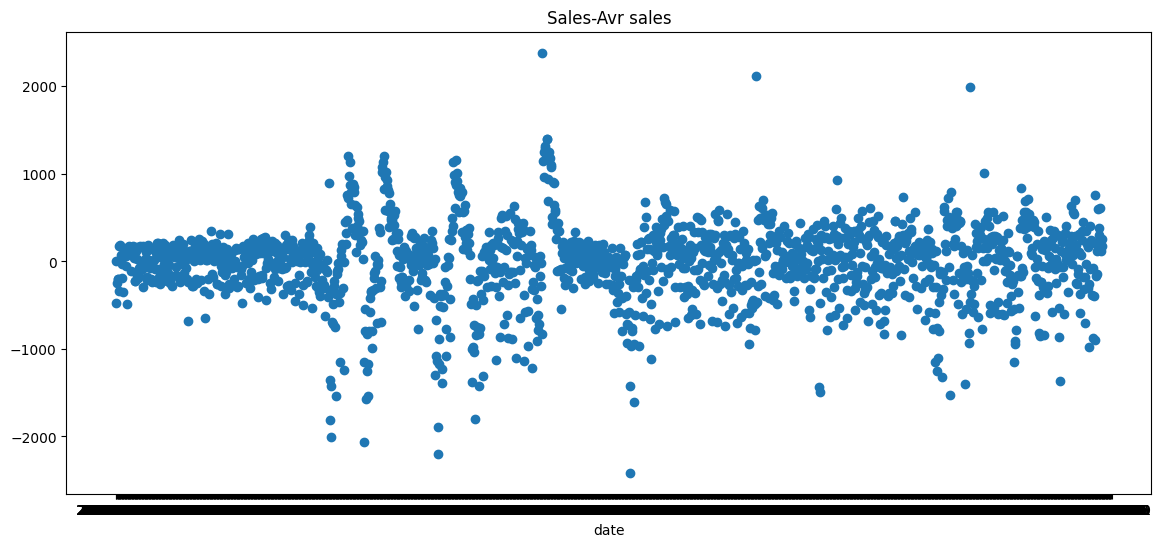

In [48]:
example=df_whole[(df_whole['store_nbr']==5) &( df_whole['family']== 'BEVERAGES')] 

plt.figure(figsize=[14,6])
plt.scatter(example['date'],example['Avr_sales']-example['sales'])

plt.title("Sales-Avr sales")
plt.xlabel("date")
 

# Save the plot
plt.savefig('plot.png')

# Display a download link in the notebook

plt.show()

 

In [49]:
FileLink('plot.png')

/kaggle/working/plot.png